# Statystyka opisowa w Python

## Analiza rozkładu jednej zmiennej

### Miary tendencji centralnej i miary pozycyjne

- średnia
- mediana
- kwantyle (kwartyle, percentyle)

### Miary rozproszenia 
- odchylenie standardowe
- IQR (rozstęp międzykwartylowy)

### Miary kształtu rozkładu
- skośność
- kurtoza

## Analiza współzależności

### Dwie zmienne numeryczne

- korelacja Pearsona
- korelacja rangowa Spearmana
- tau Kendalla

### Zmienna numeryczna (lub porządkowa) i zmienna dychotomiczna

- d Cohena



## Przykładowe dane - import z google sheets

In [1]:
import pandas as pd
URLCSV = "https://docs.google.com/spreadsheets/d/1Fuj72q5oIxLK74jBfdvI9pNr5Er2rPONfwh3szMq6-Q/export?format=csv"
dane = pd.read_csv(URLCSV)
print(dane.head())

   height  handedness  right_hand_span  left_hand_span  head_circ eye_colour  \
0     159        0.88             19.0            19.0       54.0       Blue   
1     160       -1.00             19.0            20.0       57.0      Green   
2     161        0.79             17.0            16.5       57.0      hazel   
3     161        1.00             17.0            17.5       54.0       Blue   
4     162        0.79             16.0            16.0       57.0       gray   

   gender  siblings  movies  soda   bedtime       fb_freq  fb_friends  \
0  Female         2     3.0   7.0  02:00:00    once a day       135.0   
1  Female         2     0.5   2.0  04:30:00             0         1.0   
2  Female         3     3.0   2.0  23:50:00   once a week       354.0   
3  Female         2     2.0   0.5  23:00:00    once a day       200.0   
4  Female         2     0.0   2.0  23:10:00  almost never       192.0   

                  stat_likert  
0  Neither agree nor disagree  
1              S

## Średnia arytmetyczna

In [11]:
import numpy as np

# Średni wzrost 
print("Średni wzrost - średnia arytmetyczna: ")
print(np.mean(dane['height']))

# Średni wzrost mężczyzn
mask = (dane['gender']=="Male")
print("Średni wzrost M - średnia arytmetyczna: ")
print(np.mean(dane['height'][mask]))

# Średni wzrost kobiet
maskF = (dane['gender']=="Female")
print("Średni wzrost F - średnia arytmetyczna: ")
print(np.mean(dane['height'][maskF]))

# Średnia liczba znajomych na FB
print("Średnia liczba znajomych na FB - średnia arytmetyczna: ")
print(np.mean(dane['fb_friends']))

Średni wzrost - średnia arytmetyczna: 
175.6103896103896
Średni wzrost M - średnia arytmetyczna: 
181.5681818181818
Średni wzrost F - średnia arytmetyczna: 
167.66666666666666
Średnia liczba znajomych na FB - średnia arytmetyczna: 
342.93150684931504


## Mediana

In [20]:
# Mediana wzrostu 
print("Mediana wzrostu: ")
print(np.median(dane['height']))

# Mediana wzrostu - M
mask = (dane['gender']=="Male")
print("Mediana wzrostu - M:")
print(np.median(dane['height'][mask]))

# Mediana wzrostu - F
print("Mediana wzrostu - F:")
mask2 = (dane['gender']=="Female")
print(np.median(dane['height'][mask2]))


# Mediana fb_friends
print("Mediana liczby znajomych na FB:")
print(np.median(dane['fb_friends'].dropna()))

Mediana wzrostu: 
176.0
Mediana wzrostu - M:
180.5
Mediana wzrostu - F:
166.0
Mediana liczby znajomych na FB:
280.0


## Kwantyle: 

KwaNtyle to np. kwartyle, kwintyle, decyle, percentyle. 

- pierwszy kwaRtyl = 25. percentyl
- trzeci kwaRtyl = 75. percentyl

In [26]:
print("Liczba znajomych na FB - pierwszy kwartyl:")
print(np.quantile(dane['fb_friends'].dropna(), 0.25))
print("Trzeci kwartyl:")
print(np.quantile(dane['fb_friends'].dropna(), 0.75))


Liczba znajomych na FB - pierwszy kwartyl:
121.0
Trzeci kwartyl:
483.0


Liczba znajomych na Facebooku: histogram. 

<function matplotlib.pyplot.show(close=None, block=None)>

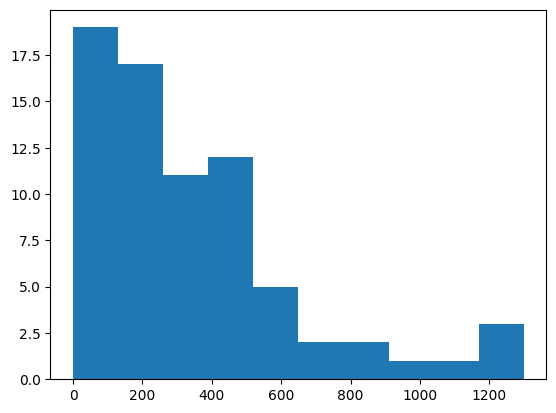

In [27]:
from matplotlib import pyplot as plt

plt.hist(dane['fb_friends'].dropna())
plt.show

## Odchylenie standardowe

Wzór "dla próbki" (z n-1):

$ s = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})^2}$

In [34]:
# ddof=1, żeby mieć zgodnośc z powyższym wzorem (n-1). 
print("Odchylenie standardowe wzrostu:")
print(np.std(dane['height'], ddof=1))

print("Odchylenie standardowe wzrostu - M:")
mask = (dane['gender']=="Male")
print(np.std(dane['height'][mask], ddof=1))

print("Odchylenie standardowe wzrostu - F:")
mask = (dane['gender']=="Female")
print(np.std(dane['height'][mask], ddof=1))

print("Odchylenie standardowe wzrostu - fb_friends:")
print(np.std(dane['fb_friends'].dropna(), ddof=1))



Odchylenie standardowe wzrostu
9.814269745410513
Odchylenie standardowe wzrostu - M
7.854483913508813
Odchylenie standardowe wzrostu - F
5.655012525774516
Odchylenie standardowe wzrostu - fb_friends
307.38002757928547


## IQR (rozstęp międzykwartylowy)

$\text{IQR} = Q_3 - Q_1$ 

In [36]:
from scipy.stats import iqr

iqr(dane['fb_friends'].dropna())

np.float64(362.0)

## Skośność 

- [współczynnik skośności](https://pl.wikipedia.org/wiki/Wsp%C3%B3%C5%82czynnik_sko%C5%9Bno%C5%9Bci)

"Współczynnik skośności przyjmuje wartość zero dla rozkładu symetrycznego, wartości ujemne dla rozkładów o lewostronnej asymetrii (wydłużone lewe ramię rozkładu) i wartości dodatnie dla rozkładów o prawostronnej asymetrii (wydłużone prawe ramię rozkładu)."

In [40]:
from scipy.stats import skew

print("Zmienna height - skośność") 
print(skew(dane['height']))

print("Zmienna fb_friends - skośność") 
print(skew(dane['fb_friends'].dropna()))


Zmienna height - skośność
0.393563241265341
Zmienna fb_friends - skośność
1.2792423723717934


## Kurtoza

Kurtoza mierzy ekstremalność ogonów rozkładu (im więcej lub im silniejsze wartości odstające, tym wyższa kurtoza). [Kurtoza nie mierzy spiczatstości rozkładu (koncentracji wokół średniej)](https://ws.stat.gov.pl/Article/2022/11/043-061).

In [42]:
from scipy.stats import kurtosis

print("Zmienna height - kurtoza:") 
print(kurtosis(dane['height']))

print("Zmienna height - kurtoza:") 
print(kurtosis(dane['fb_friends'].dropna()))


Zmienna height - kurtoza
-0.27040889080278685
Zmienna height - kurtoza
1.4144462677705505


## Współczynnik korelacji Pearsona


In [44]:
#Pandas
dane['handedness'].corr(dane['fb_friends'])



np.float64(-0.021741585290315824)

In [46]:
#NumPy
mask = (dane['handedness'].notna() & dane['fb_friends'].notna())
np.corrcoef(dane['handedness'][mask], dane['fb_friends'][mask])[0,1]

np.float64(-0.021741585290315824)

In [49]:
#scipy
from scipy.stats import pearsonr

pearsonr(dane['handedness'][mask], dane['fb_friends'][mask])

PearsonRResult(statistic=np.float64(-0.021741585290315786), pvalue=np.float64(0.8613671723445717))

## Współczynnik korelacji Spearmana (na rangach)

Algorytm: zamieniamy X i Y na rangi (najmniejsza obserwacja = 1, kolejna = 2)
Liczymy korelację Pearsona na rangach. 


In [53]:
# fb_friends i height

dane['fb_friends'].rank().corr(dane['height'].rank())

np.float64(0.16834103128343847)

In [60]:
dane['stat2'] = pd.Categorical(dane['stat_likert'], 
               categories =["Strongly disagree", "Somewhat disagree",
                            "Neither agree nor disagree", "Somewhat agree",
                             "Strongly agree"], ordered=True)

dane['stat2'].rank().corr(dane['head_circ'].rank())

np.float64(-0.06535081200433951)

In [61]:
mask = (dane['fb_friends'].notna() & dane['height'].notna())
from scipy.stats import spearmanr
spearmanr(dane['fb_friends'][mask], dane['height'][mask])


SignificanceResult(statistic=np.float64(0.16329349981555188), pvalue=np.float64(0.16746820174770358))

In [62]:
mask = (dane['stat2'].notna() & dane['head_circ'].notna())
spearmanr(dane['stat2'][mask], dane['head_circ'][mask])

SignificanceResult(statistic=np.float64(0.009147901909002132), pvalue=np.float64(0.9374864307852322))

In [63]:
mask = (dane['fb_friends'].notna() & dane['height'].notna())
from scipy.stats import kendalltau
kendalltau(dane['fb_friends'][mask], dane['height'][mask])

SignificanceResult(statistic=np.float64(0.11459817105617567), pvalue=np.float64(0.1592551652829699))

## Miara d Cohena

różnica między średnimi w dwóch grupach odniesiona do zbiorczego odchylenia standardowego (wypadkowa odchyleń standardowych w dwóch grupach)



In [64]:
def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)


In [68]:
print("d Cohena między płciami dla wzrostu:")
print(cohen_d(dane['height'][dane['gender']=="Male"], 
              dane['height'][dane['gender']=="Female"]))

print("d Cohena między płciami dla rozmiaru lewej ręki:")
print(cohen_d(dane['left_hand_span'][dane['gender']=="Male"], 
              dane['left_hand_span'][dane['gender']=="Female"]))


print("d Cohena między płciami dla rozmiaru głowy:")
print(cohen_d(dane['head_circ'][dane['gender']=="Male"], 
              dane['head_circ'][dane['gender']=="Female"]))


d Cohena między płciami dla wzrostu:
1.985625813717499
d Cohena między płciami dla rozmiaru lewej ręki:
1.6560604573390825
d Cohena między płciami dla rozmiaru głowy:
1.74495576044045


## Prawdopodobieństwo przewagi (probability of superiority)
Common Language Effect Size
AUC

Gdy nie ma korelacji, miara wynosi 0.5. 

In [74]:
from sklearn import metrics
y_true = (dane['gender']=="Male")
y_score = (dane['height'])
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
metrics.auc(fpr, tpr)

0.9287190082644627

In [76]:
from sklearn import metrics
mask = dane['left_hand_span'].notna()
y_true = (dane['gender']=="Male")[mask]
y_score = (dane['left_hand_span'])[mask]
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_score)
metrics.auc(fpr, tpr)

0.8780831571529245

W bankowości używamy AUC po przekształceniu. 
(miara jest znana pod różnymi nazwami: D Sommersa, delta Cliffa, korelacja rangowo-dwuseryjna, (pseudo)współczynnik Giniego)

Taka miara wynosi 0, gdy nie ma korelacji. 

$ D = 2 \cdot \text{AUC} - 1$
